<a href="https://colab.research.google.com/github/MikaSiders/Nm/blob/main/%D0%9B%D0%B0%D0%B1%D0%B08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Аналітичний вигляд кубічного сплайна для кожного відрізка:

Відрізок 1 [0.6; 0.8]:
S(x) = 1.7600 + 3.8026(x - 0.6) + 0.0000(x - 0.6)^2 + 11.1859(x - 0.6)^3
--------------------------------------------------
Відрізок 2 [0.8; 1.1]:
S(x) = 2.6100 + 5.1449(x - 0.8) + 6.7116(x - 0.8)^2 + -32.1298(x - 0.8)^3
--------------------------------------------------
Відрізок 3 [1.1; 1.6]:
S(x) = 3.8900 + 0.4968(x - 1.1) + -22.2052(x - 1.1)^2 + 28.7433(x - 1.1)^3
--------------------------------------------------
Відрізок 4 [1.6; 2.0]:
S(x) = 2.1800 + -0.1509(x - 1.6) + 20.9098(x - 1.6)^2 + -17.4248(x - 1.6)^3
--------------------------------------------------


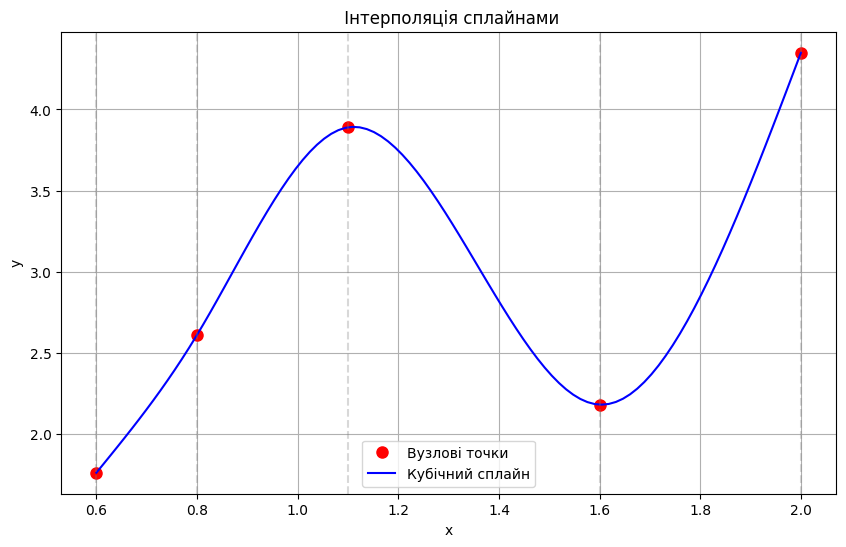

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# --- 1. Вхідні дані (Варіант 30) ---
x = np.array([0.6, 0.8, 1.1, 1.6, 2.0])
y = np.array([1.76, 2.61, 3.89, 2.18, 4.35])

# --- 2. Алгоритм розрахунку коефіцієнтів (Метод прогонки) ---
n = len(x) - 1
h = np.diff(x)
a = y[:-1] # a_i = y_i
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n + 1) # c масив розміром n+1 для зручності, c[n]=0 (природний сплайн)
alpha = np.zeros(n)

# Прямий хід прогонки для знаходження alpha
for i in range(1, n):
    term1 = (3 / h[i]) * (y[i+1] - y[i])
    term2 = (3 / h[i-1]) * (y[i] - y[i-1])
    alpha[i] = term1 - term2

l = np.ones(n + 1)
mu = np.zeros(n + 1)
z = np.zeros(n + 1)

# Розв'язання тридіагональної матриці
for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Зворотній хід для знаходження c, b, d
l[n] = 1
z[n] = 0
c[n] = 0

for j in range(n - 1, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (y[j+1] - y[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# --- 3. Виведення результатів ---
print("Аналітичний вигляд кубічного сплайна для кожного відрізка:\n")
for i in range(n):
    print(f"Відрізок {i+1} [{x[i]}; {x[i+1]}]:")
    print(f"S(x) = {a[i]:.4f} + {b[i]:.4f}(x - {x[i]}) + {c[i]:.4f}(x - {x[i]})^2 + {d[i]:.4f}(x - {x[i]})^3")
    print("-" * 50)

# --- 4. Побудова графіка ---
# Використовуємо scipy.CubicSpline для плавної лінії (перевірка)
cs = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(min(x), max(x), 100)
y_new = cs(x_new)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Вузлові точки', color='red', markersize=8)
plt.plot(x_new, y_new, label='Кубічний сплайн', color='blue')

# Додаткове оформлення
for i in range(n):
    plt.axvline(x[i], color='gray', linestyle='--', alpha=0.3)
plt.axvline(x[n], color='gray', linestyle='--', alpha=0.3)

plt.xlabel('x')
plt.ylabel('y')
plt.title(' Інтерполяція сплайнами')
plt.legend()
plt.grid(True)
plt.show()